

---

# 1.Dataset Selection

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [101]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


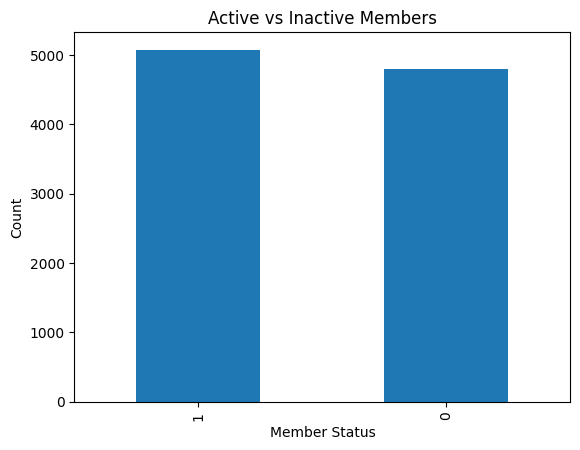

In [77]:
df['IsActiveMember'].value_counts().plot(kind='bar')
plt.xlabel('Member Status')
plt.ylabel('Count')
_ = plt.title('Active vs Inactive Members')

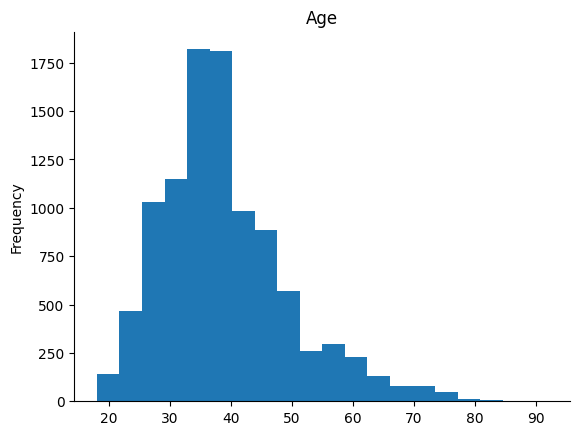

In [4]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

we have numrical and categorical varibales



---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB




---




---
#after understand the data we need to do data anaysis



##what we do in data analsis?
1. Missing values
2. duplicate rows
3. Explore about numerical varibels
4. Explore about the categorical and (encoding)
5. Find realtionships between features
6. Handling outliers


---



In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no Null values

---



In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

There is no duplicated Rows

---



In [9]:
df.drop(columns=['RowNumber', 'Surname','CustomerId','HasCrCard'], inplace=True)

and for this RowNumber and surname column we will drop it

---



for the two categorical that are nominal which is Geogropghy and gender we will convert them into numrical (encoding)

In [10]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)



---



In [12]:
df['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)

In [13]:
df['Exited'].replace({1: 0, 0: 1}, inplace=True)

Binary flag 0 if the customer closed account with bank and
1 if the customer is retained



---



In [14]:
df['Geography'].replace({'France':1, 'Spain':2, 'Germany':3}, inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,1,1,42,2,0.00,1,1,101348.88,0
1,608,2,1,41,1,83807.86,1,1,112542.58,1
2,502,1,1,42,8,159660.80,3,0,113931.57,0
3,699,1,1,39,1,0.00,2,0,93826.63,1
4,850,2,1,43,2,125510.82,1,1,79084.10,1


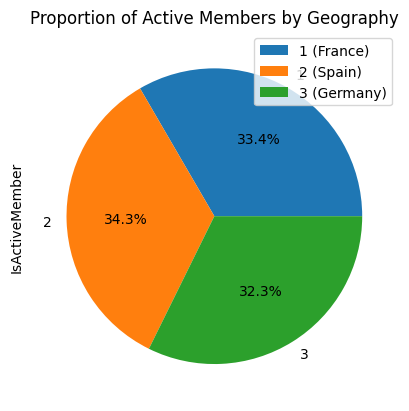

In [99]:
import matplotlib.pyplot as plt

# Create a dictionary to map geographies to numeric labels
geography_labels = {1:'France',2: 'Spain', 3:'Germany'}

# Calculate the proportion of active members by geography
proportion_active_members = df.groupby('Geography')['IsActiveMember'].mean()

# Plotting the pie chart
# Plotting the pie chart
proportion_active_members.plot(kind='pie', autopct='%1.1f%%')

# Set the title of the graph
plt.title('Proportion of Active Members by Geography')

# Add the names of the geographies as labels
labels = [f'{geography} ({geography_labels[geography]})' for geography in proportion_active_members.index]
plt.legend(labels=labels)

# Display the plot
plt.show()

<Axes: xlabel='CreditScore', ylabel='Count'>

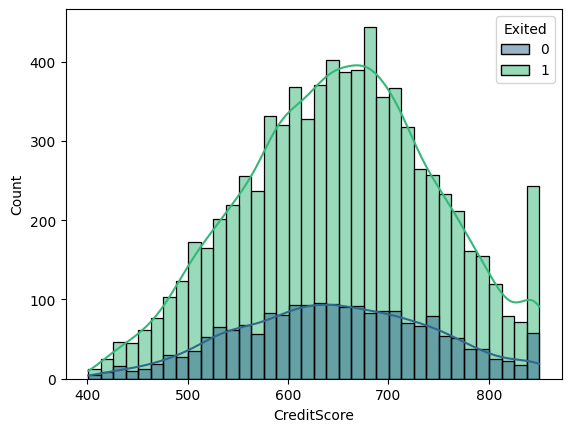

In [94]:
# @title CreditScore distribution by Exited

sns.histplot(data=df, x="CreditScore", hue="Exited", kde=True, palette="viridis")

<Axes: xlabel='Age', ylabel='Count'>

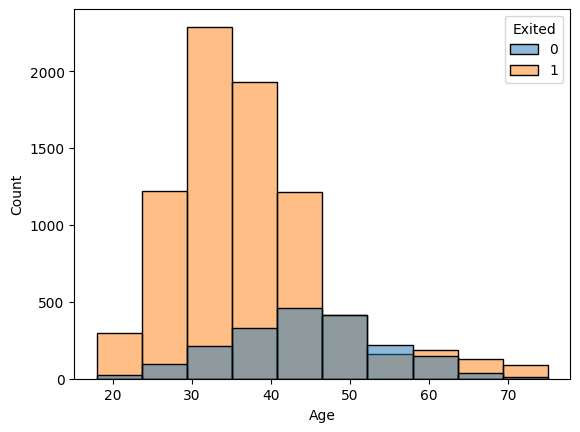

In [83]:
# @title Distribution of Age by Exited

sns.histplot(data=df, x="Age", hue="Exited", bins=10)

In [100]:
# Assuming 'df' is your DataFrame containing the data

# Calculate the correlation matrix
correlation_matrix = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','IsActiveMember','Geography','Exited']].corr()

# Display the correlation matrix
print(correlation_matrix)

                 CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.006445 -0.000529  0.006899       0.009890   
Age                -0.006445  1.000000 -0.014294  0.032174      -0.050606   
Tenure             -0.000529 -0.014294  1.000000 -0.012745       0.011639   
Balance             0.006899  0.032174 -0.012745  1.000000      -0.331006   
NumOfProducts       0.009890 -0.050606  0.011639 -0.331006       1.000000   
EstimatedSalary     0.002440 -0.009749  0.007710  0.013673       0.013585   
IsActiveMember      0.023497  0.074395 -0.030198 -0.008617       0.011998   
Geography           0.010793  0.052544  0.003268  0.347629      -0.011670   
Exited              0.016263 -0.299407  0.014148 -0.116503       0.104739   

                 EstimatedSalary  IsActiveMember  Geography    Exited  
CreditScore             0.002440        0.023497   0.010793  0.016263  
Age                    -0.009749        0.074395   0.052544 -0.299407  
Tenure       

In [18]:

import pandas as pd
from scipy.stats import chi2_contingency as chi2

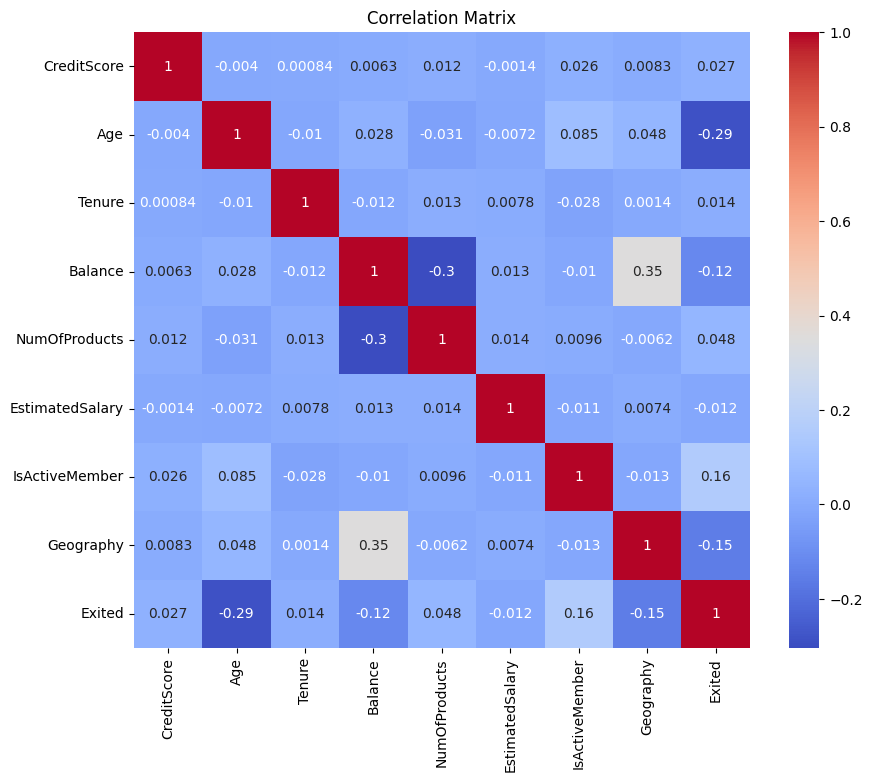

In [19]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Age', ylabel='Balance'>

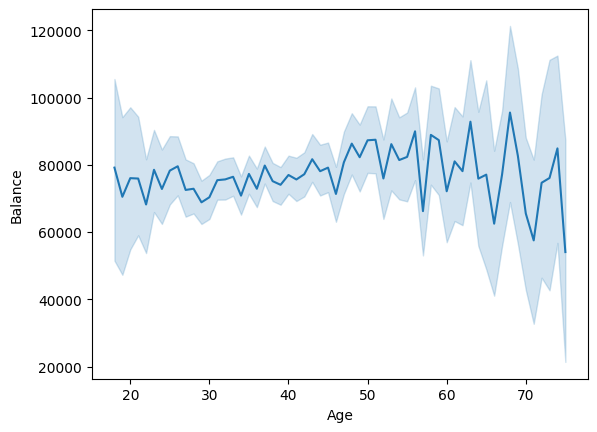

In [80]:
sns.lineplot(x = "Age", y = "Balance", data = df)

 check for outliers using the z-score method

---



In [21]:
import pandas as pd
import numpy as np

# Select only the numerical columns for outlier detection
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Calculate z-scores for each numerical column
z_scores = np.abs((df[numerical_columns] - df[numerical_columns].mean()) / df[numerical_columns].std())

# Define a threshold for outlier detection (e.g., z-score > 3)
outlier_threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > outlier_threshold)

# Print the indices and values of the outliers
for column in numerical_columns:
    outliers = df.loc[outlier_indices[0], column]
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in CreditScore:
7       376
70      738
85      652
158     646
230     673
       ... 
9646    850
9671    649
9736    659
9894    521
9936    609
Name: CreditScore, Length: 201, dtype: int64
Outliers in Age:
7       29
70      58
85      75
158     73
230     72
        ..
9646    71
9671    78
9736    78
9894    77
9936    77
Name: Age, Length: 201, dtype: int64
Outliers in Tenure:
7        4
70       2
85      10
158      6
230      1
        ..
9646    10
9671     4
9736     2
9894     6
9936     1
Name: Tenure, Length: 201, dtype: int64
Outliers in Balance:
7       115046.74
70      133745.44
85           0.00
158      97259.25
230          0.00
          ...    
9646     69608.14
9671     68345.86
9736    151675.65
9894         0.00
9936         0.00
Name: Balance, Length: 201, dtype: float64
Outliers in NumOfProducts:
7       4
70      4
85      2
158     1
230     2
       ..
9646    1
9671    2
9736    1
9894    2
9936    1
Name: NumOfProducts, Length: 201, dtype: in

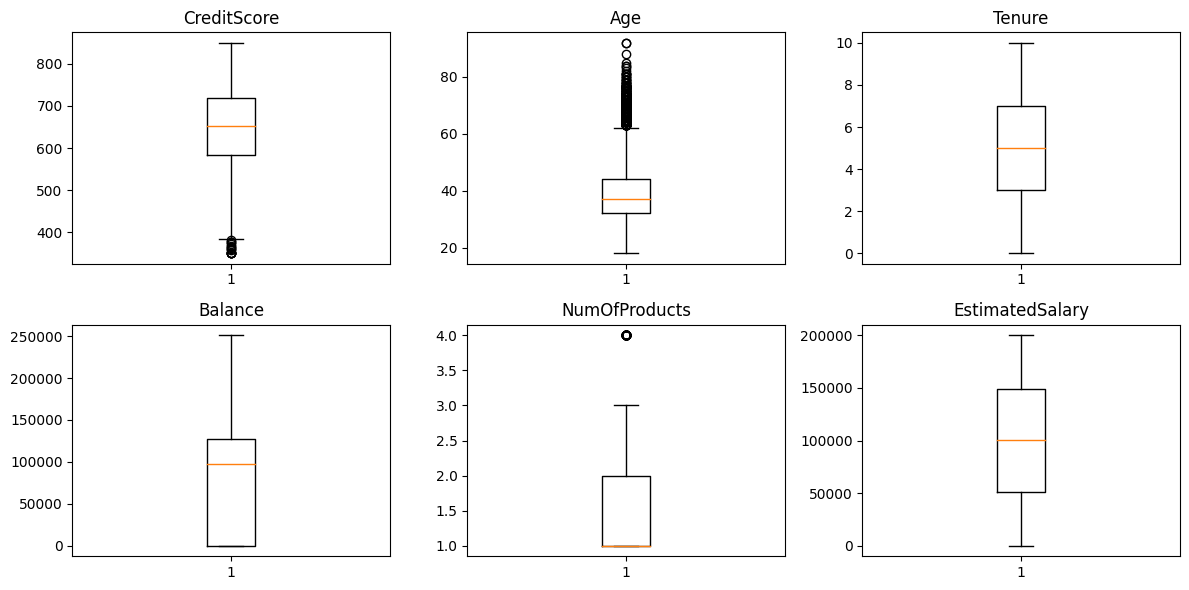

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only the numerical columns for outlier detection
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create a box plot for each numerical column
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [23]:
df[df.Age<60].Exited.value_counts()

Exited
1    7584
0    1890
Name: count, dtype: int64

In [24]:
df[df.Age>60].Exited.value_counts()

Exited
1    349
0    115
Name: count, dtype: int64

In [25]:
df = df.drop(df[df['Age'] > 75].index)

In [26]:
df.NumOfProducts.unique()

array([1, 3, 2, 4])

In [27]:
df = df.drop(df[df['CreditScore'] < 400].index)

In [28]:
df[(df.CreditScore < 600)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
2,502,1,1,42,8,159660.80,3,0,113931.57,0
8,501,1,0,44,4,142051.07,2,1,74940.50,1
10,528,1,0,31,6,102016.72,2,0,80181.12,1
11,497,2,0,24,3,0.00,2,0,76390.01,1
12,476,1,1,34,10,0.00,2,0,26260.98,1
...,...,...,...,...,...,...,...,...,...,...
9970,518,1,0,42,7,151027.05,2,0,119377.36,1
9974,583,1,0,33,7,122531.86,1,0,13549.24,1
9981,498,3,0,42,3,152039.70,1,1,53445.17,0
9991,597,1,1,53,4,88381.21,1,0,69384.71,0


In [29]:
df = df[df['NumOfProducts'] < 4]

In [30]:
df['CreditScore'].describe()

count    9877.000000
mean      650.917283
std        95.962450
min       401.000000
25%       584.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

the diffrence between the categories here between the serveces for each customer based on thier credit score
3026 rows



---

ages outliers are valid and meaningful in our analysis, it might be appropriate to keep them.

In [31]:
len(df[df['NumOfProducts'] >= 4])

0

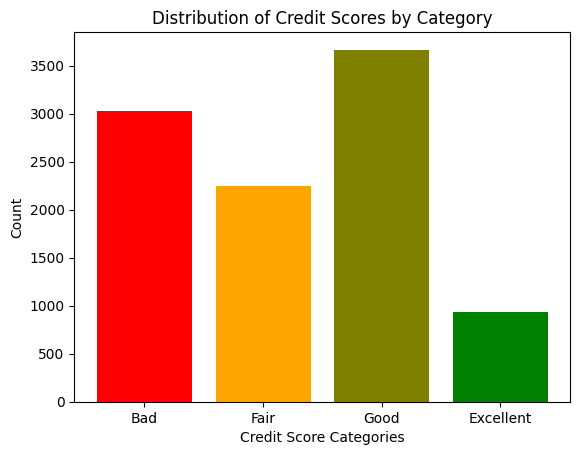

In [32]:
# Define the categories and their corresponding score ranges
categories = ['Bad', 'Fair', 'Good', 'Excellent']
score_ranges = [(300,600), (601,660), (661,780), (781,850)]

# Count the number of scores falling into each category
score_counts = [((df['CreditScore'] >= range[0]) & (df['CreditScore'] <= range[1])).sum() for range in score_ranges]

# Define a color palette for the categories
color_palette = ['red', 'orange', 'olive', 'green']

# Create a bar plot with custom colors
plt.bar(categories, score_counts, color=color_palette)

# Set the labels and title
plt.xlabel('Credit Score Categories')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores by Category')

# Show the plot
plt.show()



---



# 2. Neural Network Experimentation



---

# Single perceptron layer with L1 regularization

---


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, RMSprop, Adam, Adagrad
from keras.regularizers import l1 ,l2
import matplotlib.pyplot as plt
from tensorflow.keras import Input

Training with SGD optimizer...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5034 - loss: 0.9298 - val_accuracy: 0.5168 - val_loss: 9613.2324
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6849 - loss: 0.6794 - val_accuracy: 0.5244 - val_loss: 3999.2271
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8028 - loss: 0.5590 - val_accuracy: 0.5262 - val_loss: 157.5600
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.5087 - val_accuracy: 0.2056 - val_loss: 197.6259
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4916 - val_accuracy: 0.6989 - val_loss: 18.3834


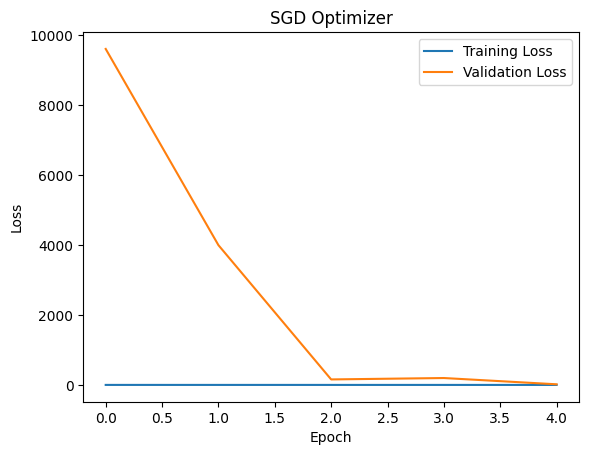

Training with RMSprop optimizer...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5666 - loss: 0.9148 - val_accuracy: 0.5288 - val_loss: 8290.2451
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - loss: 0.7715 - val_accuracy: 0.5262 - val_loss: 4399.3784
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7274 - loss: 0.6673 - val_accuracy: 0.5262 - val_loss: 1899.6388
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.5956 - val_accuracy: 0.2056 - val_loss: 180.9572
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.5509 - val_accuracy: 0.2056 - val_loss: 198.0122


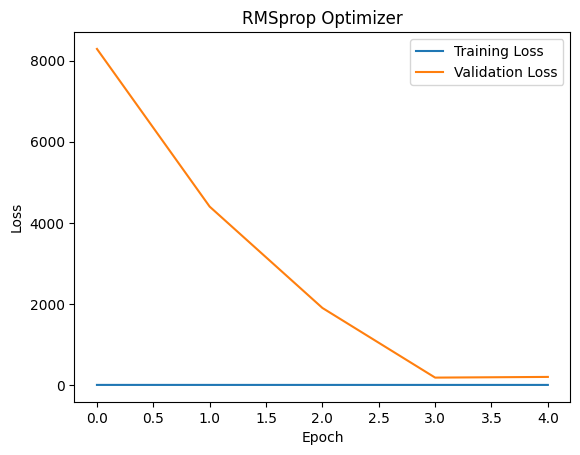

Training with Adam optimizer...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5176 - loss: 0.9266 - val_accuracy: 0.2062 - val_loss: 37540.7539
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5878 - loss: 0.7805 - val_accuracy: 0.2056 - val_loss: 24588.5391
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7011 - loss: 0.6685 - val_accuracy: 0.2056 - val_loss: 13682.4922
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.5962 - val_accuracy: 0.2056 - val_loss: 4419.0576
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7921 - loss: 0.5505 - val_accuracy: 0.2056 - val_loss: 820.9276


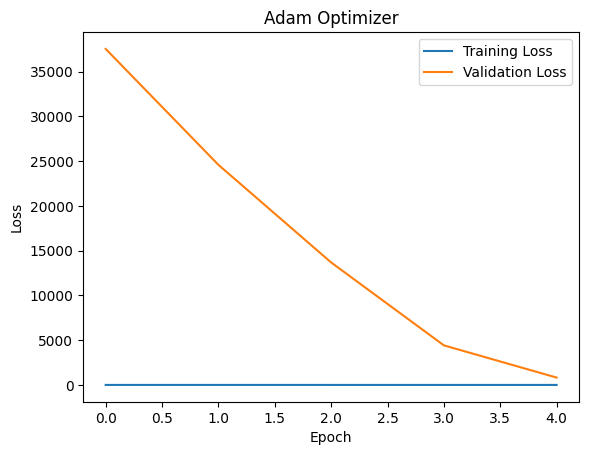

Training with Adagrad optimizer...
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5140 - loss: 1.0025 - val_accuracy: 0.2182 - val_loss: 44767.8945
Epoch 2/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5291 - loss: 0.9673 - val_accuracy: 0.2170 - val_loss: 44362.5469
Epoch 3/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5258 - loss: 0.9669 - val_accuracy: 0.2157 - val_loss: 44058.6602
Epoch 4/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5225 - loss: 0.9614 - val_accuracy: 0.2132 - val_loss: 43803.7109
Epoch 5/5
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5294 - loss: 0.9464 - val_accuracy: 0.2132 - val_loss: 43580.6055


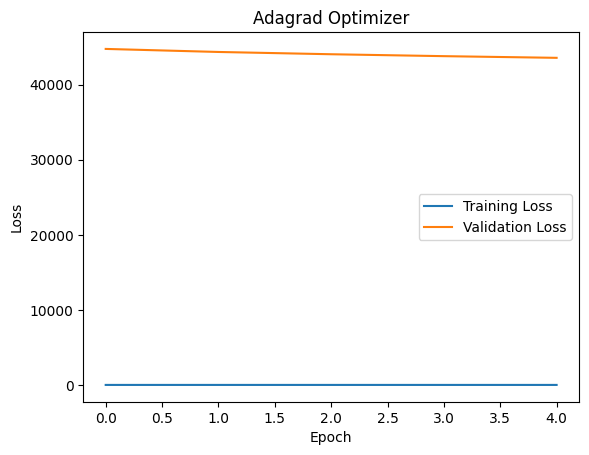

In [56]:

# Split the data into features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the list of optimizers to experiment with
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adam': Adam(),
    'Adagrad': Adagrad()
}

# Train the model with different optimizers
for optimizer_name, optimizer in optimizers.items():
    print(f'Training with {optimizer_name} optimizer...')

    # Create a Sequential model
    model = Sequential()

    # Add a single perceptron layer
    model.add(Dense(units=1, input_dim=9, activation='sigmoid', kernel_regularizer=l1(0.05)))

    # Compile the model with the current optimizer
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=40, validation_data=(X_val, y_val))

    # Visualize training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{optimizer_name} Optimizer')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



---

# Multiple perceptron layers with L1 or L2 regularization

---



Training with SGD optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7372 - loss: 14.1960 - val_accuracy: 0.7944 - val_loss: 985.9345
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8034 - loss: 5.4742 - val_accuracy: 0.7944 - val_loss: 51.0852
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8056 - loss: 3.6258 - val_accuracy: 0.7944 - val_loss: 10.4465
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 2.6166 - val_accuracy: 0.7944 - val_loss: 18.5098
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8041 - loss: 1.9316 - val_accuracy: 0.7944 - val_loss: 9.8156


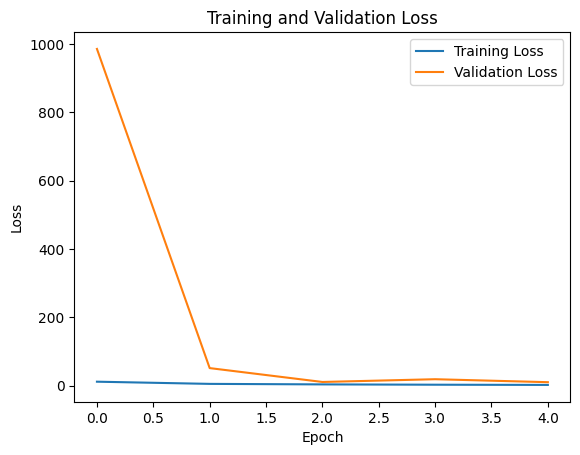

Training with RMSprop optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 7.4817 - val_accuracy: 0.7944 - val_loss: 61.6154
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8044 - loss: 0.5662 - val_accuracy: 0.7944 - val_loss: 7.7556
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.5620 - val_accuracy: 0.7944 - val_loss: 0.7227
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.5661 - val_accuracy: 0.7944 - val_loss: 3.7313
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.5590 - val_accuracy: 0.7944 - val_loss: 0.7196


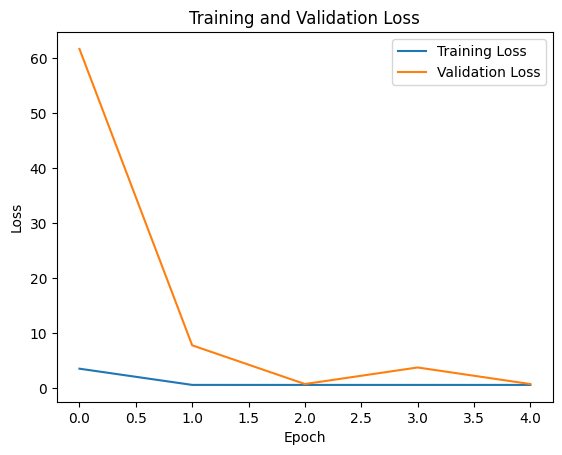

Training with Adam optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7328 - loss: 8.5864 - val_accuracy: 0.7944 - val_loss: 5.3377
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.5068 - val_accuracy: 0.7944 - val_loss: 5.4892
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8080 - loss: 0.5071 - val_accuracy: 0.7944 - val_loss: 0.6119
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8068 - loss: 0.5083 - val_accuracy: 0.7944 - val_loss: 0.6714
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.4995 - val_accuracy: 0.7944 - val_loss: 0.6295


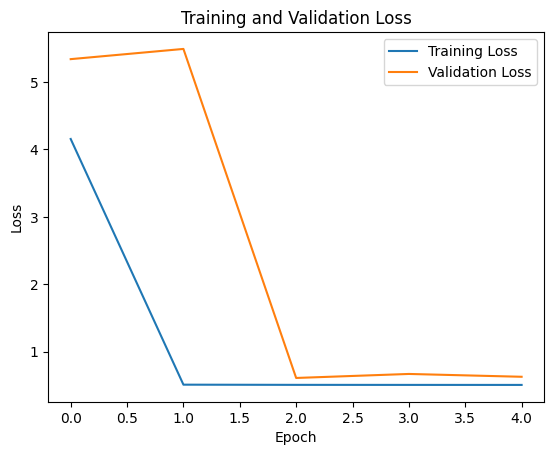

Training with Adagrad optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7870 - loss: 16.3617 - val_accuracy: 0.7944 - val_loss: 3429.5032
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8056 - loss: 13.6288 - val_accuracy: 0.7944 - val_loss: 3778.8857
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8112 - loss: 11.8323 - val_accuracy: 0.7944 - val_loss: 3717.0898
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8042 - loss: 10.4428 - val_accuracy: 0.7944 - val_loss: 3486.8247
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8023 - loss: 9.2957 - val_accuracy: 0.7944 - val_loss: 3184.1721


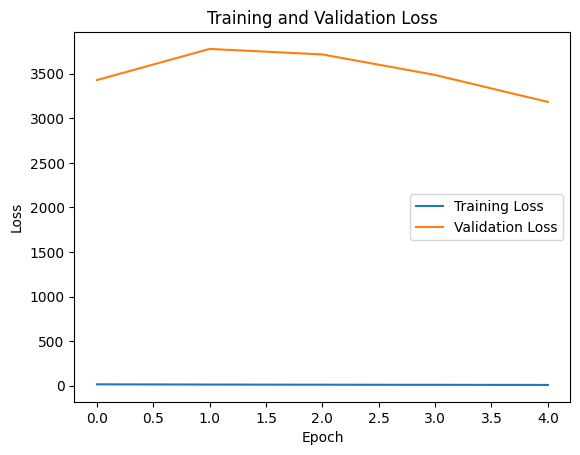

In [57]:
from tensorflow.keras.models import Model
input_layer = Input(shape=(X_train.shape[1],))
#Define input layer
input_layer = Input(shape=(input_dim,))
# Define the list of optimizers to experiment with
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adam': Adam(),
    'Adagrad': Adagrad()
}

# Train the model with different optimizers
for optimizer_name, optimizer in optimizers.items():
    print(f'Training with {optimizer_name} optimizer...')

    # Create a Sequential model
    model = Sequential()

    # Add multiple perceptron layers with L1 or L2 regularization
    hidden_layer_1 = Dense(units=300, activation='relu', kernel_regularizer=l1(0.05))(input_layer)
    hidden_layer_2 = Dense(units=100, activation='relu', kernel_regularizer=l2(0.05))(hidden_layer_1)
    output_layer = Dense(units=1, activation='sigmoid')(hidden_layer_2)



    # Create a Model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

    # Visualize training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



---

# Deep perceptron layers with L2 regularization

---



Training with SGD optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7538 - loss: 21.0410 - val_accuracy: 0.7944 - val_loss: 1307.1276
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 7.9656 - val_accuracy: 0.7944 - val_loss: 40.6936
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8024 - loss: 1.6543 - val_accuracy: 0.7944 - val_loss: 0.5714
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7961 - loss: 0.5560 - val_accuracy: 0.7944 - val_loss: 0.5531
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.5392 - val_accuracy: 0.7944 - val_loss: 0.5534


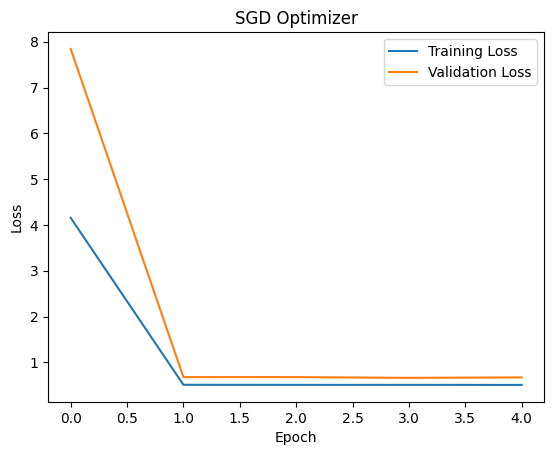

Training with RMSprop optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7244 - loss: 16.7419 - val_accuracy: 0.7944 - val_loss: 4.9167
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 1.1357 - val_accuracy: 0.7944 - val_loss: 0.5984
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8129 - loss: 0.5734 - val_accuracy: 0.7944 - val_loss: 0.5990
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.5901 - val_accuracy: 0.7944 - val_loss: 0.5985
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.5904 - val_accuracy: 0.7944 - val_loss: 0.6005


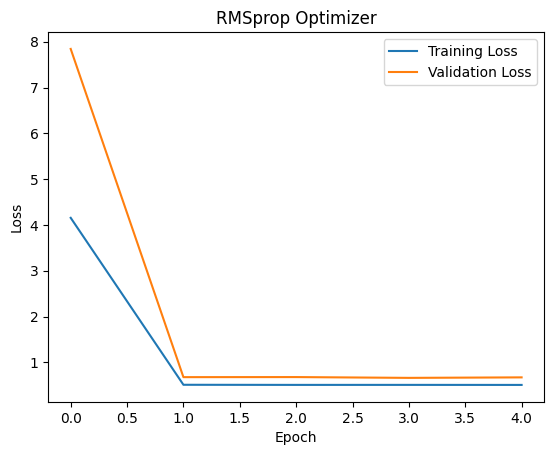

Training with Adam optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7966 - loss: 18.0123 - val_accuracy: 0.7944 - val_loss: 20.1657
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8091 - loss: 1.2932 - val_accuracy: 0.7944 - val_loss: 0.5301
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.5047 - val_accuracy: 0.7944 - val_loss: 0.5298
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8135 - loss: 0.5039 - val_accuracy: 0.7944 - val_loss: 0.5299
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8075 - loss: 0.5122 - val_accuracy: 0.7944 - val_loss: 0.5306


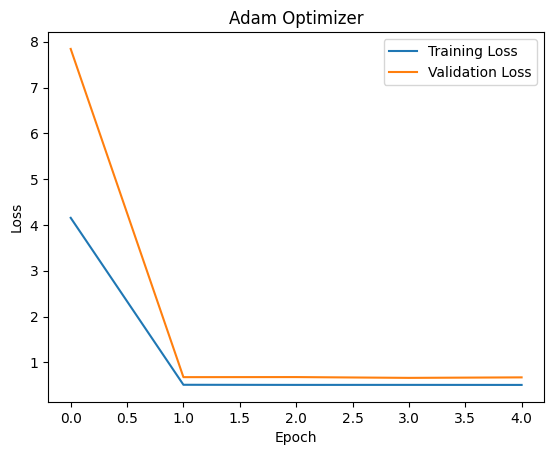

Training with Adagrad optimizer...
Epoch 1/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7679 - loss: 24.4864 - val_accuracy: 0.5756 - val_loss: 1472.4377
Epoch 2/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8137 - loss: 21.7845 - val_accuracy: 0.5952 - val_loss: 1067.2007
Epoch 3/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8183 - loss: 20.0816 - val_accuracy: 0.5857 - val_loss: 892.2241
Epoch 4/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 18.7707 - val_accuracy: 0.5781 - val_loss: 782.5448
Epoch 5/5
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8038 - loss: 17.6727 - val_accuracy: 0.5693 - val_loss: 735.5247


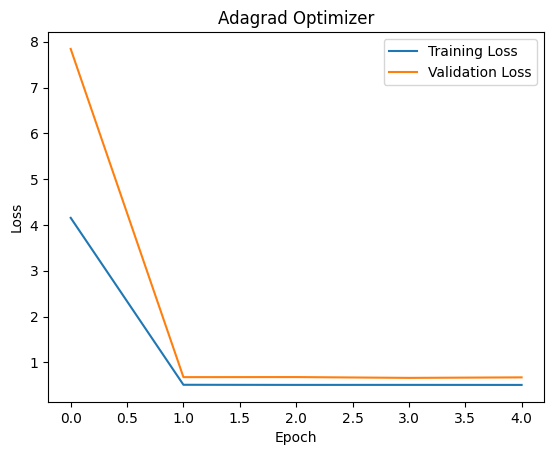

In [47]:
#Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the number of input features
input_dim = X_train_scaled.shape[1]

#Define input layer
input_layer = Input(shape=(input_dim,))
# Define the list of optimizers to experiment with
optimizers = {
    'SGD': SGD(),
    'RMSprop': RMSprop(),
    'Adam': Adam(),
    'Adagrad': Adagrad()
}

# Train the model with different optimizers
for optimizer_name, optimizer in optimizers.items():
    print(f'Training with {optimizer_name} optimizer...')

    # Create a Sequential model
    model = Sequential()


    # Add multiple perceptron layers with L2 regularization
    hidden_layer_1 = Dense(units=64, activation='relu', kernel_regularizer=l1(0.05))(input_layer)
    hidden_layer_2 = Dense(units=32, activation='relu', kernel_regularizer=l1(0.05))(hidden_layer_1)
    hidden_layer_3 = Dense(units=32, activation='relu', kernel_regularizer=l1(0.05))(hidden_layer_2)
    output_layer = Dense(units=1, activation='sigmoid')(hidden_layer_3)


    #Create a Model
    model = Model(inputs=input_layer, outputs=output_layer)

    #Compile the model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    #Train the model
    model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

     # Visualize training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{optimizer_name} Optimizer')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



---
# Perform hyperparameter tuning on the neural network models to optimize performance

---



In [49]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00




---

# Multiple perceptron layer tune

---



In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kerastuner.tuners import RandomSearch

X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
def build_model(hp):
  model = keras.Sequential()
  model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                         activation='relu', input_dim=9))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer', values=['SGD', 'RMSprop', 'Adam', 'Adagrad']),
                loss='binary_crossentropy', metrics=['accuracy'])
  return model



tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project'
   )
tuner.search(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=5)



best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]



test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)


Trial 5 Complete [00h 00m 13s]
val_accuracy: 0.8203668594360352

Best val_accuracy So Far: 0.8486190239588419
Total elapsed time: 00h 01m 07s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8375 - loss: 0.3656




---

# Deep perceptron layers tune

---



In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from kerastuner.tuners import RandomSearch

X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def build_model(hp):
    model = keras.Sequential()

    # Add the input layer
    model.add(layers.Dense(
        units=hp.Int('units_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_dim=9
    ))

    # Add multiple hidden layers
    for i in range(hp.Int('num_layers', min_value=3, max_value=6)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))

    # Add the output layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['SGD', 'RMSprop', 'Adam', 'Adagrad']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project01'
)
tuner.search(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=5)

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test)

Trial 5 Complete [00h 00m 51s]
val_accuracy: 0.8446130951245626

Best val_accuracy So Far: 0.8484081824620565
Total elapsed time: 00h 03m 06s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3572
